# Imports

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import DataFrameCreationMethods as cdf
import plottingMethods as pm
from datetime import datetime


# Prepping Data Analysis

### Path specification

In [2]:
recName = 'Stevie_Nicks_DTC'

homePath = Path(r'I:\Ganglia_Tracker_Data')

jellyPath = homePath / 'Stevie_Nicks'

recPath = jellyPath / 'Stevie_Nicks_DTC'

figurePath = cdf.makeOutDir(recPath, 'figures')

complexDFDir = cdf.makeOutDir(recPath, 'complexDF')

orientationDFPath = recPath / 'Stevie_orient_DTC.csv'

angleDataPath = recPath / 'Stevie_Nicks_AngleData_DTC'


### Prepping Create Dataframe Inputs

In [3]:
orientationData = pd.read_csv(orientationDFPath)

framerate = 120

#month, day, hour, min
starttime = datetime(2021,2,6,18,53)

daylightsavings = True

complexDFPath = complexDFDir / '{}_complexDF.csv'.format(recName)

### Prepping Plotting Main Method Inputs

In [4]:
rhopalia_position_path = homePath /'Rhopalia_Positions.csv'

rhopalia_positions = pd.read_csv(rhopalia_position_path)

In [5]:
rhopaliaDF = rhopalia_positions.loc[(rhopalia_positions['Jellyfish']=='Stevie')]
rhopaliaDF

,Jellyfish,Rhopalia Label,Rhopalia Position,Removed,Orientation Rho
196,Stevie,1,12.685,NO,YES
197,Stevie,2,33.745,NO,NO
198,Stevie,3,56.480,NO,NO
199,Stevie,4,73.731,NO,NO
200,Stevie,5,88.580,NO,NO
201,Stevie,6,112.074,NO,NO
202,Stevie,7,140.068,NO,NO
203,Stevie,8,165.784,NO,NO
204,Stevie,9,194.962,NO,NO
205,Stevie,10,219.415,NO,NO


In [6]:
rhopos = rhopaliaDF['Rhopalia Position'].tolist()
rholab = rhopaliaDF['Rhopalia Label'].tolist()

# Running Data Analysis

### Running CreateComplexDF

In [7]:
complexDF = cdf.createComplexDF(angleDataPath,
                                orientationData,
                                rhopaliaDF,
                                framerate,
                                starttime,
                                daylightsavings,
                                median_ipi=.675)

#median_ipi=1.28

In [11]:
rhopalia_positions.loc[(rhopalia_positions['Jellyfish']=='Rihanna')]

,Jellyfish,Rhopalia Label,Rhopalia Position,Removed,Orientation Rho
58,Rihanna,1,15.546,NO,YES
59,Rihanna,2,39.074,YES,NO
60,Rihanna,3,65.677,YES,NO
61,Rihanna,4,82.847,YES,NO
62,Rihanna,5,106.963,NO,NO
63,Rihanna,6,130.490,YES,NO
64,Rihanna,7,154.733,YES,NO
65,Rihanna,8,183.426,YES,NO
66,Rihanna,9,210.169,NO,NO
67,Rihanna,10,231.820,YES,NO


### Saving ComplexDF to CSV

In [8]:
complexDF.to_csv(complexDFPath)

### Loading ComplexDF back from CSV

In [9]:
complexDF = pd.read_csv(complexDFPath)

complexDF

,Unnamed: 0,global frame,chunk frame,angle,centroid x,centroid y,chunk name,movement segment,orientation factor,"the right line of the v mark, right dye mark",...,InitiatorSameAfterS20,InitiatorSameAfterS30,RhopaliaSameAfter,isHourMark,is10MinuteMark,isMinuteMark,isLightChange,by eye verification,SleepWake_median_ipi_after,SleepWake_median_ipi_before
0,0,10408233,183,63.060472,314,385,20210206_453pm_Stevie_Nicks_DTC_cam2vidnum0,0,18.068,245.0,...,True,True,False,False,False,False,None,NaN,Sleep,Wake
1,1,10408689,639,76.148581,314,389,20210206_453pm_Stevie_Nicks_DTC_cam2vidnum0,0,18.068,245.0,...,False,False,False,False,False,False,None,NaN,Sleep,Wake
2,2,10409099,1049,191.003541,314,388,20210206_453pm_Stevie_Nicks_DTC_cam2vidnum0,0,18.068,245.0,...,False,False,False,False,False,False,None,NaN,Sleep,Wake
3,3,10409501,1451,143.130102,315,386,20210206_453pm_Stevie_Nicks_DTC_cam2vidnum0,0,18.068,245.0,...,False,False,False,False,False,False,None,NaN,Sleep,Wake
4,4,10410007,1957,189.211027,314,386,20210206_453pm_Stevie_Nicks_DTC_cam2vidnum0,0,18.068,245.0,...,False,False,False,False,False,False,None,NaN,Sleep,Wake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101,6101,20437935,422156,238.495733,273,312,20210206_453pm_Stevie_Nicks_DTC_cam2vidnum9,3,NaN,NaN,...,NaN,NaN,False,False,False,False,None,NaN,Sleep,Wake
6102,6102,20438147,422368,234.272602,273,312,20210206_453pm_Stevie_Nicks_DTC_cam2vidnum9,3,NaN,NaN,...,NaN,NaN,False,False,False,False,None,NaN,Sleep,Wake
6103,6103,20440942,425163,225.629599,272,312,20210206_453pm_Stevie_Nicks_DTC_cam2vidnum9,3,NaN,NaN,...,NaN,NaN,False,False,False,True,None,NaN,Sleep,Wake
6104,6104,20443494,427715,229.666858,272,312,20210206_453pm_Stevie_Nicks_DTC_cam2vidnum9,3,NaN,NaN,...,NaN,NaN,False,False,False,False,None,NaN,Sleep,Wake


### Running plotting main method

I:\DataAnalysis\figures.py:534: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQuery['bounded angle'] = dfQuery['bounded angle'].apply(lambda x: int(x))
No handles with labels found to put in legend.
I:\DataAnalysis\plottingMethods.py:1155: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(gs[i, 0])
I:\DataAnalysis\plottingMethods.py:1155: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ea

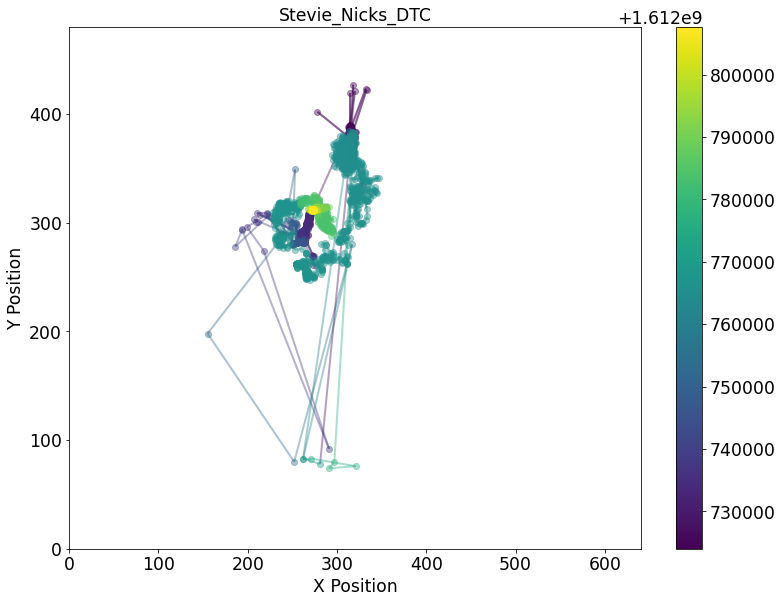

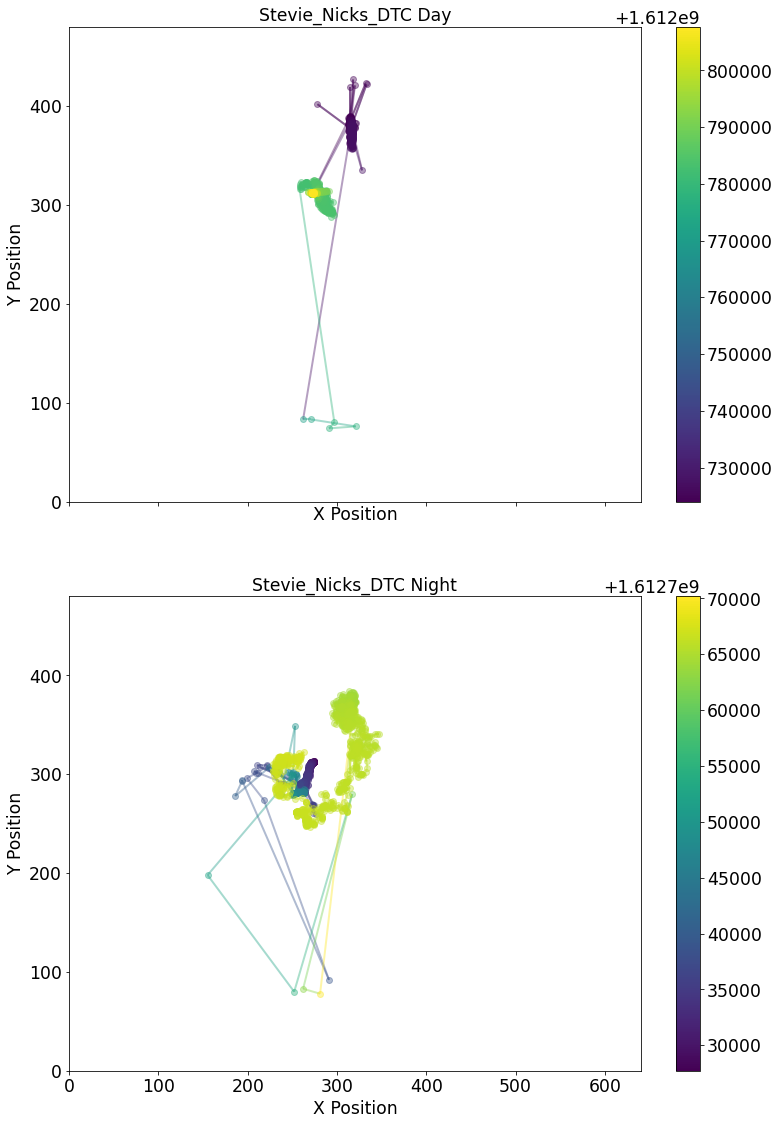

In [10]:
pm.main(recName, figurePath, complexDF, rhopos, rholab, histogram_constraints=[0,0.025])

### Runnning Validation